## What is Retrieval Augmented Generation or RAG?

- Retrieval-Augmented Generation (RAG) is a powerful framework that integrates retrieval into the sequence generation process. 
- Essentially, RAG operates by fetching relevant documents or data snippets based on a query and then using this retrieved information to generate a coherent and contextually appropriate response. This method is particularly valuable in fields like chatbot development, where the ability to provide precise answers derived from extensive databases of knowledge is crucial.

- RAG fundamentally enhances the natural language understanding and generation capabilities of models by allowing them to access and leverage a vast amount of external knowledge. The approach is built upon the synergy between two main components: a retrieval system and a generative model. 
- The retrieval system first identifies relevant information from a knowledge base, which the generative model then uses to craft responses that are not only accurate but also rich in detail and scope.

### Motivation behind RAGs

- LLMs are trained on enormous bodies of data but they aren't trained on **your** data. 
- Retrieval-Augmented Generation (RAG) solves this problem by adding **your** data to the data LLMs already have access to. Query engines, chat engines and agents often use RAG to complete their tasks.

- In RAG, your data is loaded and prepared for queries or "indexed". User queries act on the index, which filters your data down to the most relevant context. 

- `>95%` of the world's data is "private", but we can "feed it" to LLMs.

<center>
<img src="Images/NeedForRAGs.png" alt="NeedForRAGs" width="40%" height="40%"/>
</center>

- A typical RAG application has two main components:

    1. **Indexing**: A pipeline for ingesting data from a source and indexing it. *This usually happens offline.*

    2. **Retrieval and generation**: The actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.

### Stages within RAG

There are five key stages within RAG, which in turn will be a part of most larger applications that are built.

1. **Loading**: This refers to getting your data from where it lives -- whether it's text files, PDFs, another website, a database, or an API -- into your workflow. This is done with Document Loaders.

2. **Indexing**: This means creating a data structure that allows for querying the data. For LLMs this nearly always means creating `vector embeddings` i.e., numerical representations of the meaning of your data, as well as numerous other metadata strategies to make it easy to accurately find contextually relevant data.

3. **Storing**: Once the data is indexed, you will almost always want to store your index, as well as other metadata, to avoid having to re-index it.

4. **Querying**: For any given indexing strategy there are many ways you can utilize LLMs and other data structures to query, including sub-queries, multi-step queries and hybrid strategies.

5. **Evaluation**: A critical step in any flow is checking how effective it is relative to other strategies, or when you make changes. Evaluation provides objective measures of how accurate, faithful and fast your responses to queries are.



<center>
<img src="Images/RAGstages1.png" width="50%" height="50%" />
</center>

### Important concepts within RAG

There are also some terms you'll encounter that refer to steps within each of these stages.

1. **Loading stage**
    - **Nodes and Documents:** A Document is a container around any data source - for instance, a PDF, an API output, or retrieved data from a database. A Node is the atomic unit of data in LlamaIndex and represents a "chunk" of a source Document. Nodes have metadata that relate them to the document they are in and to other nodes.
    - **Connectors:** A data connector (often called a Reader) ingests data from different data sources and data formats into Documents and Nodes.

2. **Indexing Stage**
    - **Indexes:** Once you've ingested your data, you index the data into a structure that's easy to retrieve. This usually involves generating vector embeddings which are stored in a specialized database called a vector store. Indexes can also store a variety of metadata about your data.
    - **Embeddings:** LLMs generate numerical representations of data called embeddings. When filtering your data for relevance, LlamaIndex will convert queries into embeddings, and your vector store will find data that is numerically similar to the embedding of your query.

<center>
<img src="Images/RAGstages2.png" width="75%" height="75%" />
</center>

3. **Querying Stage**
    - **Retrievers:** A retriever defines how to efficiently retrieve relevant context from an index when given a query. Your retrieval strategy is key to the relevancy of the data retrieved and the efficiency with which it's done.
    - **Routers:** A router determines which retriever will be used to retrieve relevant context from the knowledge base. More specifically, the RouterRetriever class, is responsible for selecting one or multiple candidate retrievers to execute a query. They use a selector to choose the best option based on each candidate's metadata and the query.
    - **Node Postprocessors:** A node postprocessor takes in a set of retrieved nodes and applies transformations, filtering, or re-ranking logic to them.
    - **Response Synthesizers:** A response synthesizer generates a response from an LLM, using a user query and a given set of retrieved text chunks.

<center>
<img src="Images/RAGstages3.png" width="70%" height="70%" />
</center>

### Stages of RAG as a pipeline

- Try not to get overwhelmed by the representation of RAG as a pipeline. As we progress through the notebook, you'll have more clarity over the working of each stage, and the challenges one might face with working or design an application that relies on RAG. 

<center>
<img src="Images/RAGpipeline.png" width="75%" height="75%" />
</center>

- The first aspect of indexing is that we have some external documents that we want to load and put it through something called the "retriever", and the goal of the retriever is to find the documents that are relevant to the question in some way.

<center>
<img src="Images/DocumentLoader.png" width="40%" height="40%" />
</center>

- Now to establish that relationship or relevance or similarity, the textual content is converted to a numerical representation. And the reason why this is done is that it is very easy to compare the numbers (aka, the vectors) relative to free-form text. A lot of research and approaches have been discovered in the last few years to take text documents and compress them into numbers, which then can be very easily searched. 

<center>
<img src="Images/DataRepresentation.png" width="60%" height="60%" />
</center>


**How do we convert these words in the text to their numerical representation?**
- There are a few ways to achieve this. Google and other companies came up with certain statistical methods wherein you take a document, you take a look at the frequency of words, and you build a `sparse vector`, such that the vector location is a large vocabulary of possible words, and each value represents the number of occurances of the particular word. It's called `sparse` because there are many zeros in the vector, which is relative to the particular word vs. the large vocabulary of the document (i.e., not all the words in the document occur in a particular page, some of them may occur relatively later in the document, and the zeros indicate that this word does not occur in the chunk/page).

<center>
<img src="Images/NumericalRepresentations.png" width="60%" height="60%" />
</center>

- More recently, an improvised approach, `Vector Embeddings`, began gaining popularity. In the Embeddings approach, which is machine learned, you take a document, and you build a compressed fixed-length numerical representation of the document, accompanied with correspondingly efficient search mechanisms for fetching the numerical representations.

**Loading, Splitting, and Embedding**

- The basic flow over here is that we take the documents, and we split them, because embedding models have limited context window (maybe 512 or 8k tokens). Each document is split, and the splits are converted to vectors, and the vector captures the semantic meaning of the split, the vectors are then indexed. The questions are converted to vectors in the same way, and then some comparison logic is applied to fetch the split with the highest relevance.

<center>
<img src="Images/LSE.png" width="50%" height="50%" />
</center>

## Example in Action

- Let's build a small example to understand more efficiently what we have learned so far, and to have a (tiny) practical implementation of RAG
- As discussed above, recall that a typical RAG application contains two stages: 
    1. Indexing
    2. Retrieval and Generation

- We'll build an simple indexing pipeline and RAG chain that answers the questions about the contents available on a website. For our application, we'll use the [LLM Powered Autonomous Agents](https://lilianweng.github.io/posts/2023-06-23-agent/) blog authored by [Lilian Weng](https://www.linkedin.com/in/lilianweng). 

#### Prerequisites !!!:

1. Please install Anaconda Distribution for Python (if you don't have it installed already)
2. Create a new conda environment with `conda create --name rag_env python==3.10`
3. Activate your conda environment with `conda activate rag_env`
4. (Optional) If you do not wish to run Jupyter notebooks in VSCode, please install Jupyter Lab and/or Jupyter Notebook with `pip install jupyterlab notebook`
5. (Optional) Learn more about how to start the Jupyter server [here](https://jupyter.org/install)
6. (Optional) VSCode users, select `rag_env` as your kernel


**Caution:** LangChain depends on `onnxruntime` package which currently does not support Python>3.10

#### Installing packages

We'll focus on building our RAG application via [LangChain's](https://python.langchain.com/docs/introduction/) packages

In [ ]:
%pip install --upgrade langchain langchain-community langchain-chroma python-dotenv

# It is recommended to install your packages from the terminal rather than inside this notebook
# To install from terminal, simply do
# pip install --upgrade langchain langchain-community langchain-chroma python-dotenv

#### 1. Indexing: Loading our documents

- We need to first load the blog post contents. We can use `DocumentLoaders` for this, which are objects that load in data from a source and return a list of Documents. A Document is an object with some `page_content (str)` and `metadata (dict)`.

- In this case we’ll use the `WebBaseLoader`, which uses `urllib` to load HTML from web URLs and `BeautifulSoup` to parse it to text. We can customize the HTML to text parsing by passing in parameters to the `BeautifulSoup` parser via `bs_kwargs` [*(see BeautifulSoup docs)*](https://beautiful-soup-4.readthedocs.io/en/latest/#beautifulsoup). 
- In this case only HTML tags with class `"post-content"`, `"post-title"`, or `"post-header"` are relevant, so we’ll remove the rest.

In [1]:
# Load the env variables from the .env file

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

# Since we are only interested in the post-title, post-header, and post-content, 
# tell BeautifulSoup to retain items that belong to the class post-title, post-header, post-content
# and discard the rest.
bs4_strainer = bs4.SoupStrainer(class_=("post-title", "post-header", "post-content"))

# Load our document (which is a blog on the internet) and pass the response to BeautifulSoup
loader = WebBaseLoader(
    web_paths = ("https://lilianweng.github.io/posts/2023-06-23-agent/", ),
    bs_kwargs = {"parse_only": bs4_strainer}
)

document = loader.load()

# If the loading was a success, the length of the document will be non-zero
print("Number of characters in the document: ", len(document[0].page_content))

Number of characters in the document:  43131


- Now that we have scraped the blog, let's take a look at what does the content looks like, because remember, the content was originally meant to be rendered on browsers, and we are parsing the content using a script

In [3]:
print(document[0].page_content[:1000])



      LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:

Planning

Subgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.
Reflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.


Memory

Short-term memory: I 

#### 2. Indexing: Splitting into chunks

- Now that our document is available locally, and we know that our document is 43k characters long, the document is too long to fit in the context window of many LLMs. Even for those models that could fit the full post in their context window, models can struggle to find information in very long inputs.

- To handle this issue, we will split our `Document` into smaller chunks which we will later use for embeddings and vector store. This will help us retrieve only the most relevant bits of the blog post at runtime.

- For our `Document`, we will split it into chunks of `1000` characters with `200` characters of overlap between chunks. The overlap will help us mitigate the possibility of separating a statement from the important context related to it. 

- We'll use the `RecursiveCharacterTextSplitter` from LangChain which will recursively split the document using common separators like new lines until each chunk is of appropriate size. For generic text use cases, this is the recommended text splitter.

- We'll set `add_start_index=True` so that the character index at which each split Document starts within the initial Document is preserved as metadata attribute "start_index".

In [4]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Define how we want to break down the document into chunks, where 1 chunk = 1000 characters 
# Chunk size may exceed 1000 characters due to chunk_overlap being > 0
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size      = 1000,
    chunk_overlap   = 200,
    add_start_index = True
)

# Break down the document into chunks
document_splits = text_splitter.split_documents(document)

# Count how many chunks did our splitter create
print("Number of chunks created: ", len(document_splits))

Number of chunks created:  66


- Our blog document got broken down to 66 chunks (0 to 65). Now let's see how many characters did our splitter actually put into each chunk. Remember, the splitter will try its best to maintain the context, due to which chunks may or may not exceed 1000 characters

In [5]:
print("Number of characters in the 0th chunk: ", len(document_splits[0].page_content))

Number of characters in the 0th chunk:  969


In [6]:
print("Contents of 0th chunk:\n", document_splits[0].page_content)

Contents of 0th chunk:
 LLM Powered Autonomous Agents
    
Date: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng


Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.
Agent System Overview#
In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:

Planning

Subgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.
Reflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.


Memory


In [7]:
print("Metadata associated with the 0th chunk: ", document_splits[0].metadata)

Metadata associated with the 0th chunk:  {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'start_index': 8}


- Notice how the `start_index` is `8`. If you look at the output of `print(document[0].page_content[:1000])` written above, you'll notice 1 new-line character and 7 empty spaces before the first word 'LLM'. This means our actual document content starts at the 8th position or 8th character from the very start of the document.

- We know our 0th chunk has <1000 characters, but is there any chunk that exceeds 1000 characters?

In [8]:
chunks_above_threshold = [
    i for i, chunk in enumerate(document_splits) if len(chunk.page_content) > 1000
]
chunks_under_threshold = [
    i for i, chunk in enumerate(document_splits) if len(chunk.page_content) <= 1000
]

print("Chunks with 1000 or fewer characters: ", *chunks_under_threshold)
print("Chunks with more than 1000 characters: ", *chunks_above_threshold)

Chunks with 1000 or fewer characters:  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
Chunks with more than 1000 characters: 


- Welp. Seems like all our chunks fall within the threshold we mentioned (which 1000 characters per chunk). 
- But what about all the chunks? Are they all of uniform length? Let's visualize this!

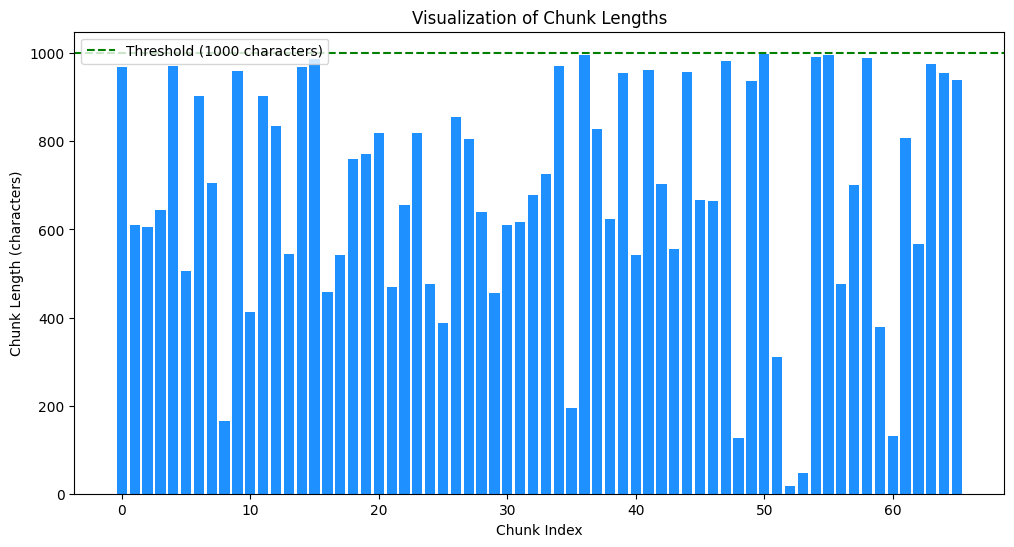

In [9]:
import matplotlib.pyplot as plt

# Extract chunk lengths
chunk_lengths = [len(chunk.page_content) for chunk in document_splits]

# Color the bars 'red' if the value<1000, else blue
colors = ['red' if length > 1000 else 'dodgerblue' for length in chunk_lengths]

plt.figure(figsize = (12, 6))
plt.bar(range(len(chunk_lengths)), chunk_lengths, color = colors)

# Add threshold line
plt.axhline(y = 1000, color = 'green', linestyle = '--', label = 'Threshold (1000 characters)')

# Add labels and title
plt.xlabel('Chunk Index')
plt.ylabel('Chunk Length (characters)')
plt.title('Visualization of Chunk Lengths')

plt.legend()
plt.show()

- Most of our chunks are around the `400` - `600` character length. Interestingly, some of our chunks are `<100` characters, which is `10x` less than our threshold.

#### 3. Indexing: Storing our chunks as embeddings

- It was fun to download the blog using our `WebBaseLoader` and retaining only the required content via `BeautifulSoup`. Even though we worked on downloading a blog from the internet, it resulted in 43k characters, which in turn resulted in 66 chunks. This is achieveable for contents that are not large, but think about how long it would take if we were to download all of Wikipedia and chunk them! And imagine repeating the whole process for every time you ask a question. If you think this would result in a lot of unncessary computations, then you're right. To avoid this, we'll use a different approach.

- Now we need to index our 66 text chunks so that we can search over them at runtime. The most common way to do this is to embed the contents of each document split and insert these embeddings into a vector database (or vector store). When we want to search over our splits, we take a text search query, embed it, and perform some sort of "similarity" search to identify the stored splits with the most similar embeddings to our query embedding. The simplest similarity measure is cosine similarity — we measure the cosine of the angle between each pair of embeddings (which are high dimensional vectors).

- We can embed and store all of our document splits in a single command using the [Chroma vector](https://python.langchain.com/docs/integrations/vectorstores/chroma/) store and [OpenAIEmbeddings](https://platform.openai.com/docs/guides/embeddings) model.

In [10]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

vectorstore = Chroma.from_documents(
    documents           = document_splits, 
    embedding           = embeddings,
    collection_name     = "github_blog_collection",
    persist_directory   = "./rag_with_langchain_database"
)

- And we converted our document into vector embeddings via OpenAI's `text-embedding-3-large` embeddings model, and stored the vector embeddings in our collection `github_blog_collection` which is in the `rag_with_langchain_database` directory. In the directory, you'll find a `chroma.sqlite` file which our `sqlite` database, in which our data is indexed. 
- Try viewing the contents of the `chroma.sqlite` database with an Sqlite browser such as [DB Browser for SQLite](https://sqlitebrowser.org/). Take a look at what the vector embeddings look like in the database.

- This completes the Indexing portion of the basic RAG pipeline. At this point we have a query-able vector store containing the chunked contents of our blog post. Given a user question, we should ideally be able to return the snippets of the blog post that answer the question.

### 4. Retrieval and Generation: Retrieve the relevant chunks

- Now let's write the actual application logic. We want to create a simple application that takes a user question, searches for documents relevant to that question, passes the retrieved documents and initial question to a model, and returns an answer.

- First we need to define our logic for searching over documents. We'll use LangChain's `Retriever` interface which wraps an index that can return relevant `Documents` given a string query.

- The most common type of `Retriever` is the [VectorStoreRetriever](https://python.langchain.com/docs/how_to/vectorstore_retriever/), which uses the similarity search capabilities of a vector store to facilitate retrieval. Any VectorStore can easily be turned into a `Retriever` with `VectorStore.as_retriever()`

In [11]:
retriever = vectorstore.as_retriever(
    search_type = "similarity", 

    # Limit the number of documents k returned by the retriever
    search_kwargs = {
        "k": 3
    }
)

retrieved_docs = retriever.invoke("What are the approaches to Task Decomposition?")

len(retrieved_docs)

3

In [12]:
print(retrieved_docs[0].page_content)

Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majority vote.
Task decomposition can be done (1) by LLM with simple prompting like "Steps for XYZ.\n1.", "What are the subgoals for achieving XYZ?", (2) by using task-specific instructions; e.g. "Write a story outline." for writing a novel, or (3) with human inputs.


## References

- [FreeCodeCamp - RAG from Scratch](https://www.freecodecamp.org/news/mastering-rag-from-scratch/)
- [LlamaIndex - High Level Concepts - RAG](https://docs.llamaindex.ai/en/stable/getting_started/concepts/)
- [LangSmith - Getting Started](https://docs.smith.langchain.com/)
- [LangSmith - Annotate code for tracing](https://docs.smith.langchain.com/how_to_guides/tracing/annotate_code)
- [LangSmith - Log traces to specific project](https://docs.smith.langchain.com/how_to_guides/tracing/log_traces_to_project)
- [Chroma Vector Database - Getting started](https://docs.trychroma.com/getting-started)